In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from matplotlib.colors import ListedColormap

In [2]:
know_in = pd.read_csv('C:/Users/Payam/Documents/0_MetroC/My_Teaching/kMeans/knowledge.csv')
know_in.head()

,STG,SCG,STR,LPR,PEG,UNS
0,0.00,0.00,0.00,0.00,0.00,very_low
1,0.08,0.08,0.10,0.24,0.90,High
2,0.06,0.06,0.05,0.25,0.33,Low
3,0.10,0.10,0.15,0.65,0.30,Middle
4,0.08,0.08,0.08,0.98,0.24,Low


In [3]:
# changing the names of the columns to numbers
know = np.array(know_in)
know = pd.DataFrame(know)
know.head()

,0,1,2,3,4,5
0,0,0,0,0,0,very_low
1,0.08,0.08,0.1,0.24,0.9,High
2,0.06,0.06,0.05,0.25,0.33,Low
3,0.1,0.1,0.15,0.65,0.3,Middle
4,0.08,0.08,0.08,0.98,0.24,Low


0 1


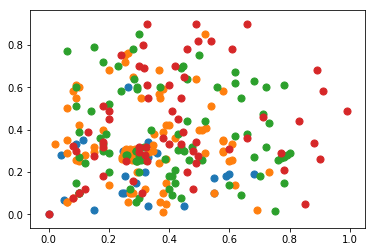

0 2


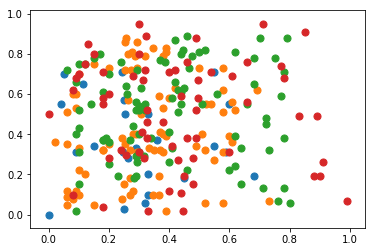

0 3


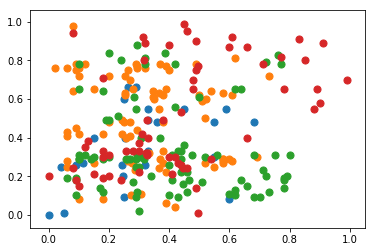

0 4


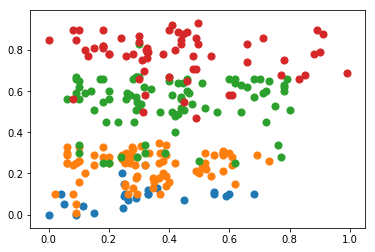

1 2


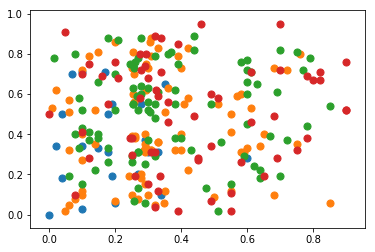

1 3


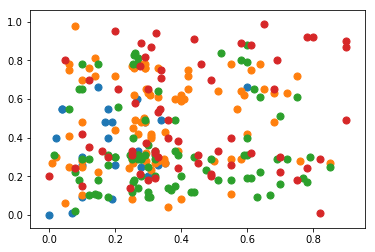

1 4


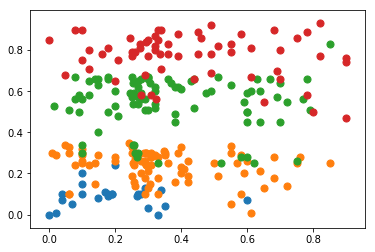

2 3


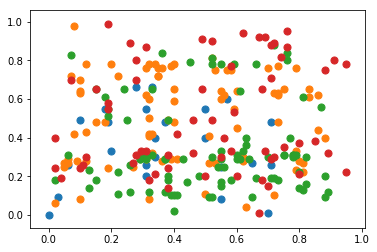

2 4


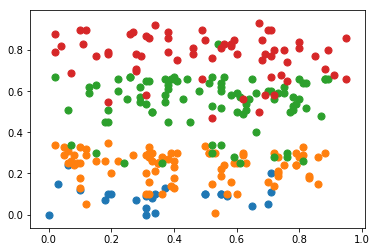

3 4


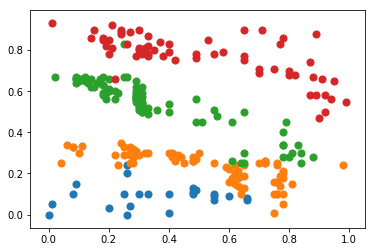

In [9]:
# having a look at the features
cols = []
for i in range(5):
    cols.append(i)
    rem_cols = list(set(range(5))-set(cols))
    for j in rem_cols:        
        print(i,j)
        plt.scatter(know[i][know[5] == 'very_low'],know[j][know[5] == 'very_low'], s=50)
        plt.scatter(know[i][know[5] == 'Low'],know[j][know[5] == 'Low'], s=50)
        plt.scatter(know[i][know[5] == 'Middle'],know[j][know[5] == 'Middle'], s=50)
        plt.scatter(know[i][know[5] == 'High'],know[j][know[5] == 'High'], s=50)
        plt.show()

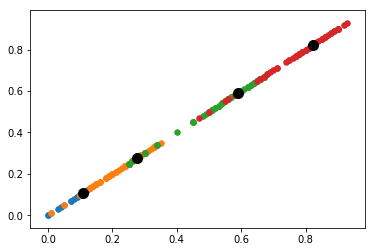

In [15]:
# applying the k-means with only one feature 
features = know[[4,4]]

kmn = KMeans(n_clusters=4, random_state=10)
kmn.fit(features)
cents = pd.DataFrame(kmn.cluster_centers_)
plt.scatter(know[4][know[5] == 'very_low'],know[4][know[5] == 'very_low'], s=30)
plt.scatter(know[4][know[5] == 'Low'],know[4][know[5] == 'Low'], s=30)
plt.scatter(know[4][know[5] == 'Middle'],know[4][know[5] == 'Middle'], s=30)
plt.scatter(know[4][know[5] == 'High'],know[4][know[5] == 'High'], s=30)
plt.scatter(cents[0],cents[1], s=100, color = 'black')
plt.show()

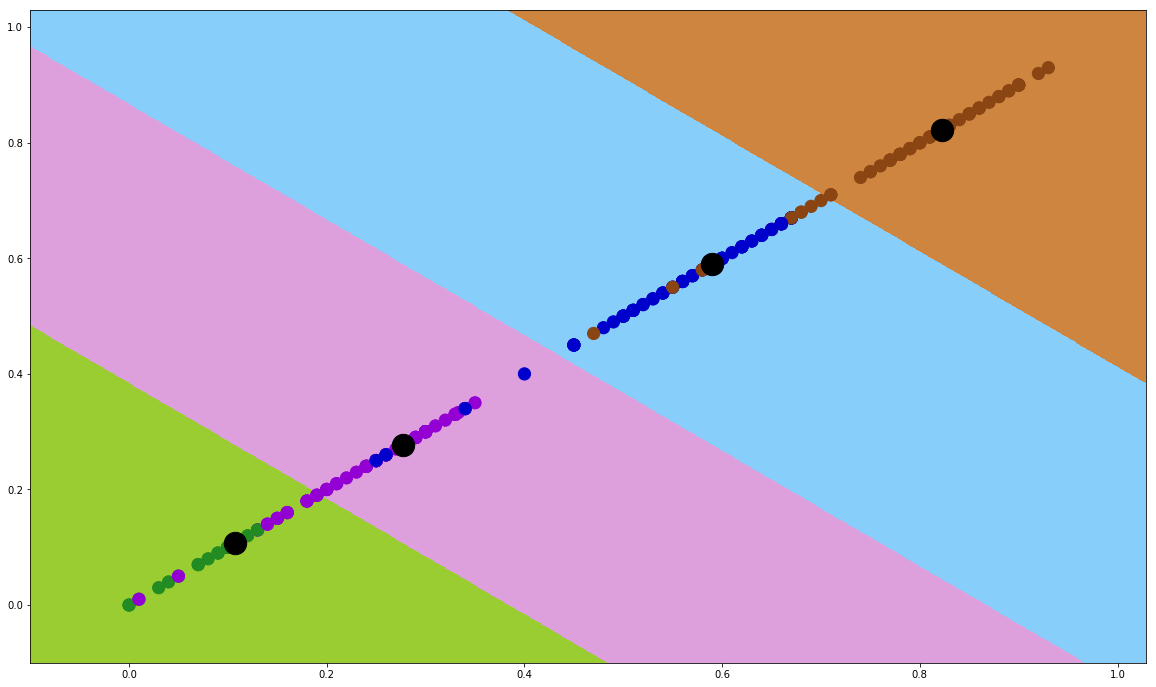

In [24]:
y = know[5].copy()

keys = {}
for i in range(len(y.unique())):
    keys[y.unique()[i]] = i+1

# Replacing levels with numbers
y.replace(keys, inplace = True)

h = .001  # step size in the mesh

# Create color maps
#cmap_bold = ListedColormap(['#0000ff','#9400d3', '#2e8b57', '#8b4513'])
cmap_bold = ListedColormap(['#228b22', '#8b4513', '#9400d3','#0000cd'])
cmap_light = ListedColormap(['#87cefa', '#9acd32', '#cd853f', '#dda0dd'])


# we create an instance of Neighbours Classifier and fit the data.
kmn = KMeans(n_clusters=4, random_state=10, max_iter=700)
kmn.fit(features)

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = know[4].min() - 0.1, know[4].max() + 0.1
y_min, y_max = know[4].min() - 0.1, know[4].max() + 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = kmn.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.rc('figure', figsize=(20, 12))
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(know[4], know[4], c=y, cmap=cmap_bold, s = 150)
plt.scatter(cents[0],cents[1], s=500, color = 'black')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.show()

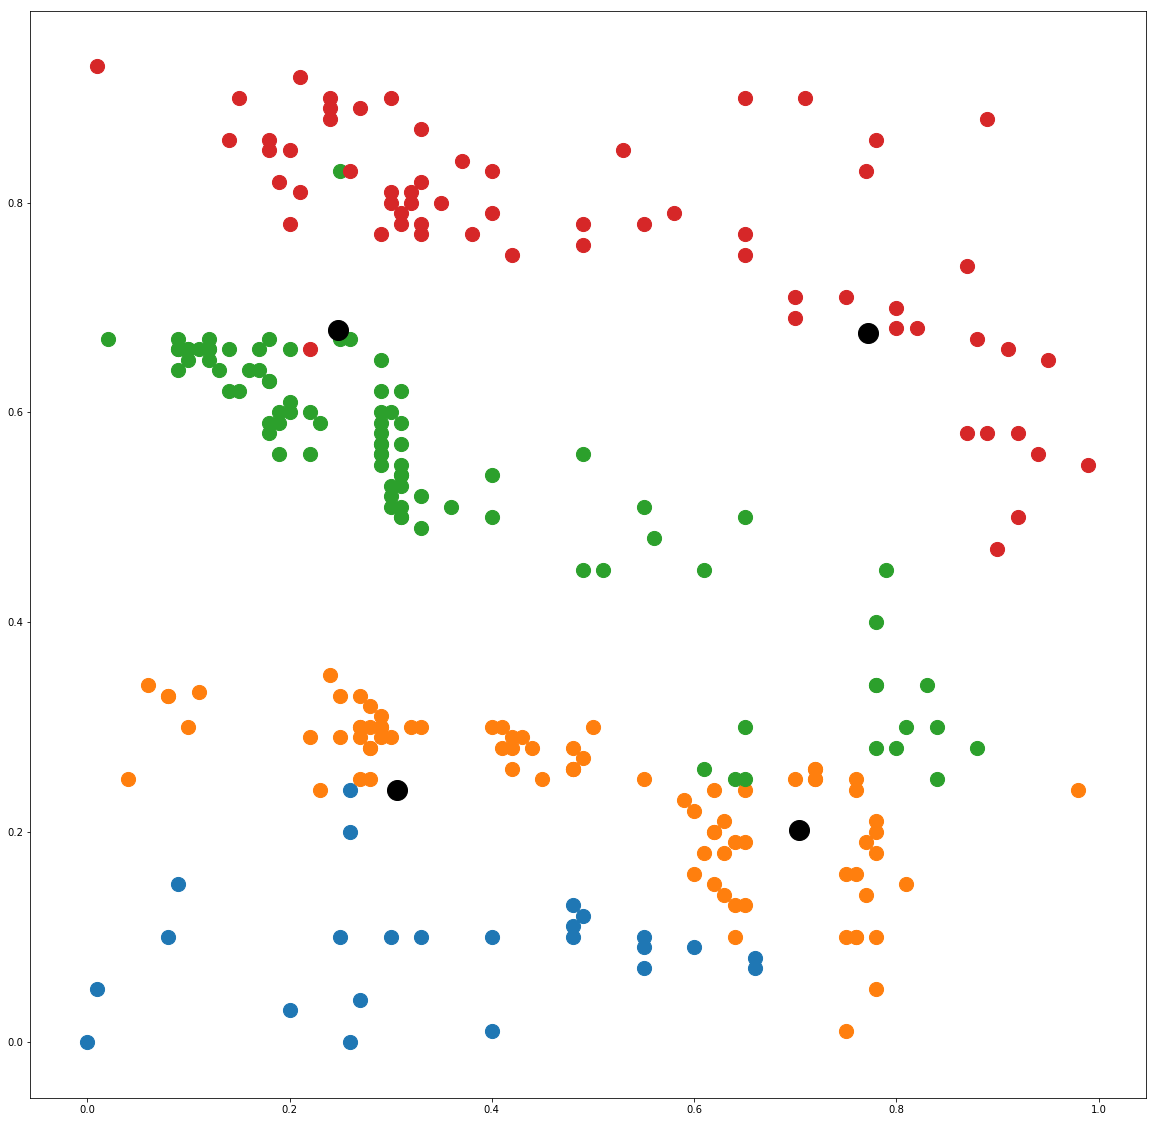

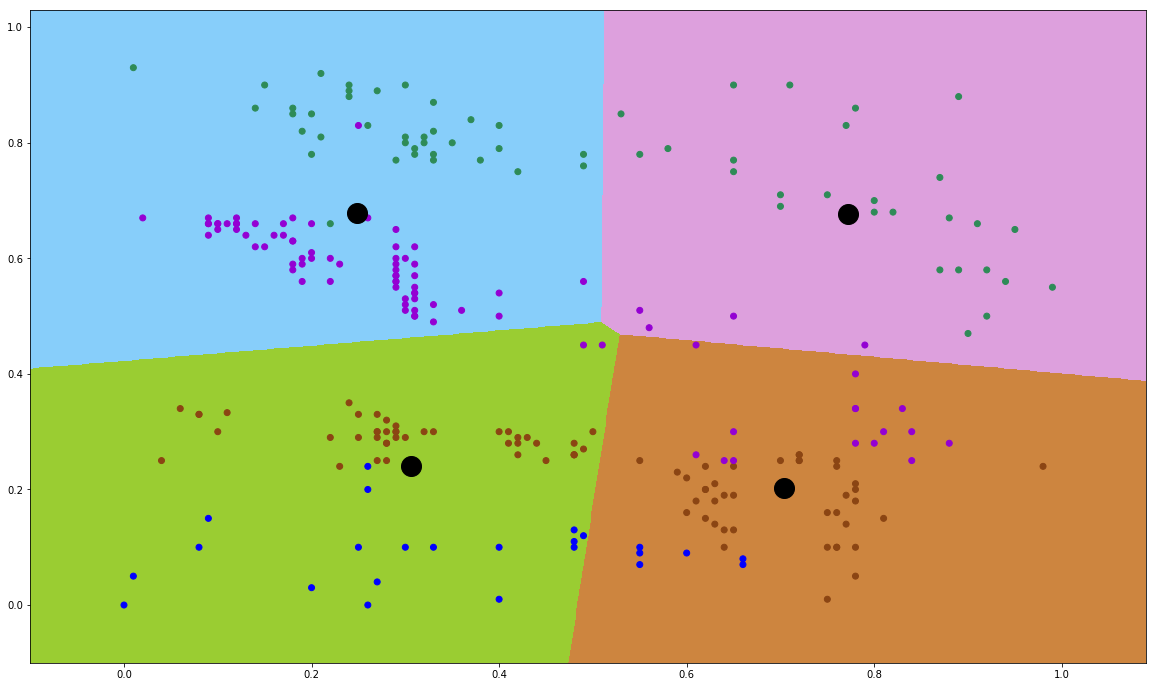

In [25]:
# Applying the k-means with two features 

features = know[[3,4]]

kmn = KMeans(n_clusters=4, random_state=10)
kmn.fit(features)
kmn.labels_
kmn.cluster_centers_
cents = pd.DataFrame(kmn.cluster_centers_)

plt.figure(figsize=(20, 20))
plt.scatter(know[3][know[5] == 'very_low'],know[4][know[5] == 'very_low'], s=200)
plt.scatter(know[3][know[5] == 'Low'],know[4][know[5] == 'Low'], s=200)
plt.scatter(know[3][know[5] == 'Middle'],know[4][know[5] == 'Middle'], s=200)
plt.scatter(know[3][know[5] == 'High'],know[4][know[5] == 'High'], s=200)
plt.scatter(cents[0],cents[1], s=400, color = 'black')


# Create color maps
cmap_bold = ListedColormap(['#0000ff', '#2e8b57', '#8b4513', '#9400d3'])
cmap_light = ListedColormap(['#87cefa', '#9acd32', '#cd853f', '#dda0dd'])


# we create an instance of Neighbours Classifier and fit the data.
kmn = KMeans(n_clusters=4, random_state=10, max_iter=700)
kmn.fit(features)

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = know[3].min() - 0.1, know[3].max() + 0.1
y_min, y_max = know[4].min() - 0.1, know[4].max() + 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = kmn.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.rc('figure', figsize=(20, 12))
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(know[3], know[4], c=y, cmap=cmap_bold)
plt.scatter(cents[0],cents[1], s=400, color = 'black')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.show()   